In [6]:
import operator

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.language_models.chat_models import BaseChatModel
from langchain_core.prompts import PromptTemplate
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START, StateGraph, END
from dotenv import load_dotenv

In [8]:
# Custom Reducer & Shared State
def custom_reducer(model1, model2):
   return model2

class SharedState(TypedDict):
    starters: Annotated[str, custom_reducer]
    model: Annotated[BaseChatModel, custom_reducer]
    dsa_topics: Annotated[list, operator.add]
    system_design_topics: Annotated[list, operator.add]
    project_ideas: Annotated[list,operator.add]

In [9]:
# Node: Get DSA Topics
def get_dsa_topics(state):
  system = '''
  You are a Software Engineering interview assistant. You are instructed to provide a list of
  5 Data Structures which should be most crucial for cracking Coding Interview rounds of top
  Product Based companies.
  
  Please provide only the comma separated list.
  '''

  prompt = PromptTemplate(template=system)
  chain = prompt | state['model'] | StrOutputParser()

  answer = chain.invoke({})
  state['dsa_topics'] = answer.split(",")

  return state

In [10]:
# Node: Get System Design Topics
def get_system_design_topics(state):
  system = '''
  You are a Software Engineering interview assistant. You are instructed to provide a list of
  5 System Design topics which should be most crucial for cracking Coding Interview rounds of top
  Product Based companies.
  
  Please provide only the comma separated list.
  '''

  prompt = PromptTemplate(template=system)
  chain = prompt | state['model'] | StrOutputParser()

  answer = chain.invoke({})
  state['system_design_topics'] = answer.split(",")

  return state

In [11]:
# Node: Get Project ideas
def get_project_ideas(state):
  system = '''
  You are a Software Engineering interview assistant. You are instructed to provide a list of
  5 Project ideas which should be most crucial for cracking Coding Interview rounds of top
  Product Based companies.
  
  Please provide only the comma separated list.
  '''

  prompt = PromptTemplate(template=system)
  chain = prompt | state['model'] | StrOutputParser()

  answer = chain.invoke({})
  state['project_ideas'] = answer.split(",")

  return state

In [12]:
# Node: Create Model
def create_model(state):
   model = ChatOpenAI(model_name="gpt-4o")
   state['model'] = model
   
   return state

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	create_model(create_model)
	get_dsa_topics(get_dsa_topics)
	get_system_design_topics(get_system_design_topics)
	get_project_ideas(get_project_ideas)
	__end__([<p>__end__</p>]):::last
	__start__ --> create_model;
	create_model --> get_dsa_topics;
	get_dsa_topics --> get_system_design_topics;
	get_project_ideas --> __end__;
	get_system_design_topics --> get_project_ideas;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



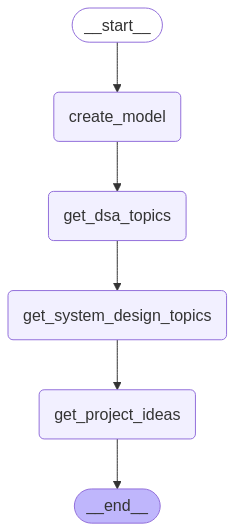

['Array', ' Linked List', ' Stack', ' Queue', ' Binary Tree', 'Array', ' Linked List', ' Stack', ' Queue', ' Binary Tree', 'Array', ' Linked List', ' Stack', ' Queue', ' Binary Tree', 'Array', ' Linked List', ' Stack', ' Queue', ' Binary Tree']
['Scalability', ' Load Balancing', ' Database Sharding', ' Caching', ' CAP Theorem', 'Scalability', ' Load Balancing', ' Database Sharding', ' Caching', ' CAP Theorem']
['Data Structures and Algorithms Visualizer', ' Online Code Editor and Compiler', ' Real-time Chat Application', ' Collaborative Document Editor', ' Stock Price Prediction using Machine Learning.']


In [14]:
from IPython.display import Image, display

def build_graph(serially=False):
   load_dotenv()
   workflow = StateGraph(SharedState)

   workflow.add_node("create_model", create_model)
   workflow.add_node("get_dsa_topics", get_dsa_topics)
   workflow.add_node("get_system_design_topics", get_system_design_topics)
   workflow.add_node("get_project_ideas", get_project_ideas)

   if (serially):
      # Serial arrangement
      workflow.add_edge(START, "create_model")
      workflow.add_edge("create_model", "get_dsa_topics")
      workflow.add_edge("get_dsa_topics", "get_system_design_topics")
      workflow.add_edge("get_system_design_topics", "get_project_ideas")
      workflow.add_edge("get_project_ideas", END)
   else:
      # Parallel arrangement
      workflow.add_edge(START, "create_model")
      workflow.add_edge("create_model", "get_dsa_topics")
      workflow.add_edge("create_model", "get_system_design_topics")
      workflow.add_edge("create_model", "get_project_ideas")
      workflow.add_edge("get_dsa_topics", END)
      workflow.add_edge("get_system_design_topics", END)
      workflow.add_edge("get_project_ideas", END)

   graph = workflow.compile()

   try:
      print(graph.get_graph().draw_mermaid())
      display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
   except Exception:
      # This requires some extra dependencies and is optional
      pass

   return graph.invoke({
      "starters": "Starting the graph execution"
   })

response = build_graph(True)
print(response['dsa_topics'])
print(response['system_design_topics'])
print(response['project_ideas'])